---

# Optimal Store Location Predictor (Cire Coffee Co.) 

### Objective:
The goal of this project is to provide data-driven insights to Cire Coffee Co. on optimizing store locations and maximizing profitability. We'll use existing store data and surveyed neighborhood data to predict the best future store locations and simulate their profitability.

### Steps:
1. **Data Exploration**: Understand the structure of the data, visualize key relationships, and explore summary statistics.
2. **Feature Engineering**: Create derived features like profit margin, and prepare the data for modeling.
3. **Predictive Modeling**: Build machine learning models to predict the most profitable new store locations.
4. **Simulation & Analysis**: Simulate multiple store-opening strategies and evaluate profitability.
---



## Step 1: Data Exploration

In this section, we will load the existing store data and the survey data for potential future store locations. We'll perform exploratory data analysis (EDA) to get a better understanding of the data structure, distribution of variables, and relationships between key features.


In [52]:

import pandas as pd
import matplotlib.pyplot as plt

# Load store data and survey data using relative paths
store_data_path = 'store_data.csv'
survey_combined_path = 'survey_combined.xlsx'

store_data = pd.read_csv(store_data_path)
survey_combined = pd.read_excel(survey_combined_path)

# Display the first few rows to confirm the data is loaded correctly
store_data.head(), survey_combined.head()


(   Store Number  Annual Revenue  Annual Operational Costs  Median Income      Format Location Name  Mean Age  Staff Friendliness Index  Traffic Busyness Index
 0          1000       273683.31                 177962.39          63800  Drive-thru   Emmerthorne        31                      9.37                    4.77
 1          1001       221680.56                 125477.09          68200  Drive-thru       Wychlow        36                      5.00                    5.48
 2          1002       302702.35                 165152.98          58700  Drive-thru     Alddleley        35                      1.55                    5.88
 3          1003       225227.31                 139547.12          59700  Drive-thru     Pendleham        37                      9.23                    4.45
 4          1004       301930.62                 154345.57          76300  Drive-thru    Siringport        37                      8.15                    7.79,
    Sr. No. Location Name  Traffic Busy

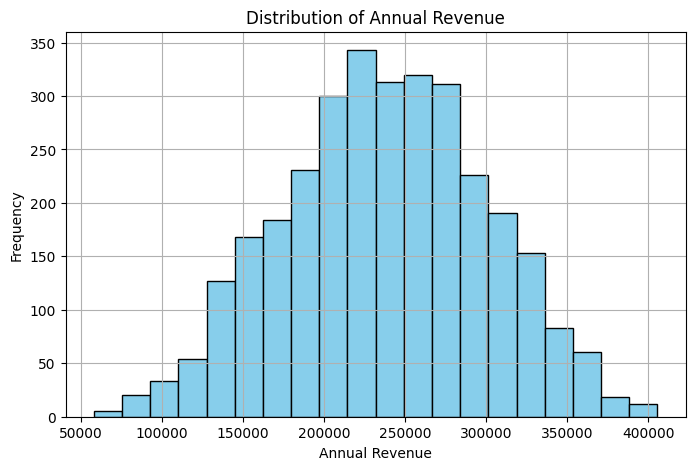

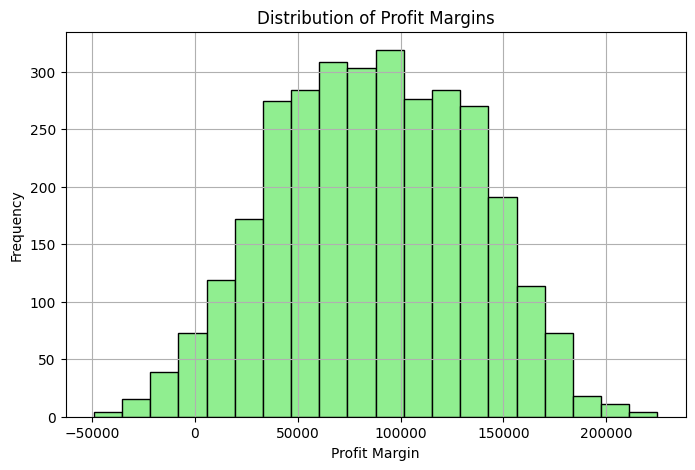

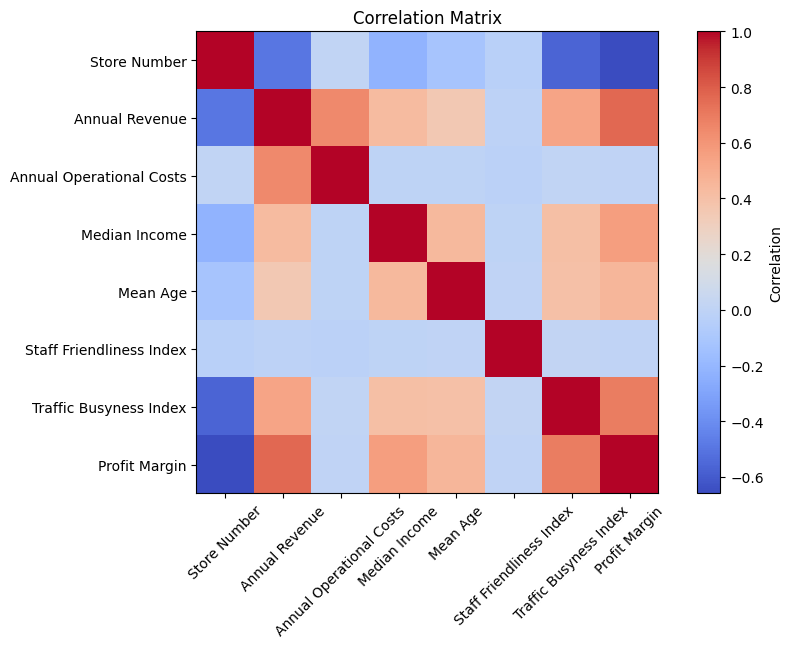

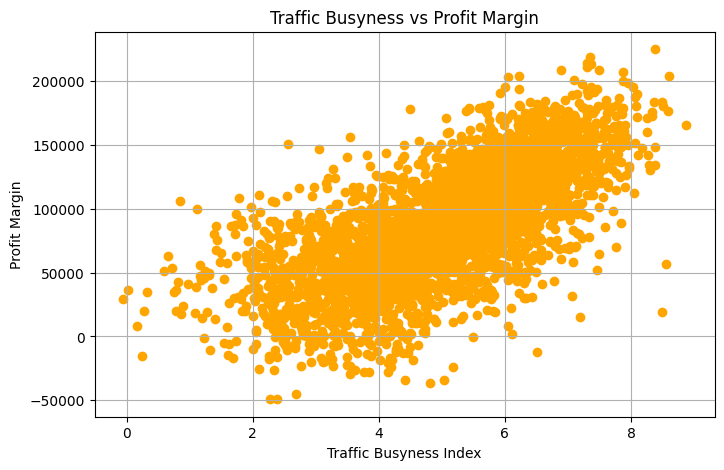

In [53]:

# 1. Distribution of Annual Revenue
plt.figure(figsize=(8, 5))
plt.hist(store_data['Annual Revenue'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Revenue')
plt.xlabel('Annual Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Distribution of Profit Margins
store_data['Profit Margin'] = store_data['Annual Revenue'] - store_data['Annual Operational Costs']
plt.figure(figsize=(8, 5))
plt.hist(store_data['Profit Margin'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Profit Margins')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Correlation heatmap (excluding non-numeric columns)
plt.figure(figsize=(10, 6))
# Select only numeric columns for the correlation matrix
numeric_columns = store_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# 4. Scatter plot: Traffic Busyness Index vs. Profit Margin
plt.figure(figsize=(8, 5))
plt.scatter(store_data['Traffic Busyness Index'], store_data['Profit Margin'], color='orange')
plt.title('Traffic Busyness vs Profit Margin')
plt.xlabel('Traffic Busyness Index')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()



## Key Findings from Data Exploration:

1. **Distribution of Annual Revenue**:
    - The distribution of annual revenue shows that most stores have revenue clustered between \$150,000 and \$300,000, with a few outliers earning much higher.

2. **Distribution of Profit Margins**:
    - The profit margin distribution highlights that most stores maintain profit margins between \$50,000 and \$150,000, with a small number of stores showing exceptionally high profit margins.

3. **Correlation Analysis**:
    - **Strong correlation** exists between **annual revenue** and **operational costs** (as expected).
    - Traffic busyness and profit margin show some level of positive correlation, suggesting that stores in busier areas may yield higher profits.
    - Mean age, income, and other factors seem to have a weaker relationship with profit margins, indicating these may not be primary drivers of profitability but has some role in driving the profit margin.

4. **Traffic Busyness vs. Profit Margin**:
    - The scatter plot shows a positive relationship between traffic busyness and profit margins, indicating that busier locations tend to result in higher profits.
    - However, this relationship is not perfectly linear, suggesting that other factors also play a role in determining profitability.

---
# Step 2: Feature Engineering

In this section, we will create features that enhance the predictive power of our model. The focus is on identifying key features that contribute to store profitability and optimizing them for modeling.

The steps include:
1. **Standardization of Features**: Standardizing features like Median Income, Traffic Busyness Index, and Annual Operational Costs ensures that all variables are on the same scale, which improves model performance.
2. **Feature Selection**: We will focus on the following key features for both the store data and the survey data:
    - **Median Income**: The income level of the store's neighborhood.
    - **Mean Age**: The average age of the population in the store's neighborhood.
    - **Traffic Busyness Index**: The amount of traffic around the store, which could impact sales.
    - **Annual Operational Costs**: The operational costs associated with running a store, which will be used from the store data.
    - **Expected Store Expenditures**: The projected operational costs for the surveyed locations, renamed for consistency during the analysis.

Standardizing these features helps prevent certain variables from dominating the model due to differing scales.

After feature engineering, we will have a refined dataset ready for the modeling phase.


In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the datasets
store_data_path = 'store_data.csv'
survey_combined_path = 'survey_combined.xlsx'

store_data = pd.read_csv(store_data_path)
survey_data = pd.read_excel(survey_combined_path)

# 1. Standardizing features for the store data
store_features_to_scale = ['Median Income', 'Mean Age', 'Traffic Busyness Index', 'Annual Operational Costs']
scaler = StandardScaler()
store_data_scaled = store_data.copy()
store_data_scaled[store_features_to_scale] = scaler.fit_transform(store_data[store_features_to_scale])

# 2. Standardizing features for the survey data
# Rename the column in survey data for consistency
survey_data.rename(columns={'Expected Store Expenditures': 'Annual Operational Costs'}, inplace=True)
survey_features_to_scale = ['Median Income', 'Mean Age', 'Traffic Busyness Index', 'Annual Operational Costs']
survey_data_scaled = survey_data.copy()
survey_data_scaled[survey_features_to_scale] = scaler.transform(survey_data[survey_features_to_scale])

# Displaying the first few rows of the scaled data
print("Scaled Store Data:")
print(store_data_scaled[store_features_to_scale].head())
print("\nScaled Survey Data:")
print(survey_data_scaled[survey_features_to_scale].head())

Scaled Store Data:
   Median Income  Mean Age  Traffic Busyness Index  Annual Operational Costs
0      -0.406161 -0.238863               -0.159408                  0.683640
1      -0.002800  0.290321                0.306923                 -0.622095
2      -0.873694  0.184484                0.569644                  0.364966
3      -0.782021  0.396158               -0.369585                 -0.272059
4       0.739752  0.396158                1.824140                  0.096098

Scaled Survey Data:
   Median Income  Mean Age  Traffic Busyness Index  Annual Operational Costs
0       3.198148  0.501995               -0.665147                  0.532670
1       3.702441  0.925342               -2.635558                  1.656414
2       5.270233 -0.873884                1.305265                 -0.989895
3       5.862808  1.242852               -0.008343                  0.954130
4       0.324840 -0.133026               -1.978754                 -0.713400


### Findings:

After completing the feature engineering process:
- We successfully standardized all relevant features, including **Median Income**, **Traffic Busyness Index**, **Annual Operational Costs**, and **Expected Store Expenditures**, ensuring they are on the same scale for better model performance.
- The focus on key features helps to optimize the predictive capability of our models, as they have shown to be significant contributors to store profitability.
- This refined dataset will enable us to build a more accurate and effective predictive model in the next step.


---
# Step 3: Data Modeling

In this step, we will focus on training machine learning models to predict store profitability. 
The goal is to build a model that can identify the most profitable store locations based on the features engineered earlier.

We will break this step into two parts:
- **Modeling Phase**: Train and evaluate models using existing store data.
- **Prediction Phase**: Use the best-performing model to predict profitability for new store locations and identify top locations.


## Part 1: Modeling

### Objective:
To train and evaluate machine learning models that can predict the annual revenue of store locations based on key features.

### Steps:
1. **Data Preparation**: 
   - Prepare the dataset using existing store data to create a model that predicts annual revenue based on features such as Traffic Busyness Index, Mean Age, Median Income, and Annual Operational Costs.
   
2. **Model Selection**: 
   - We will use two machine learning models: XGBoost and TensorFlow.
   
3. **Evaluation**: 
   - The models will be evaluated based on metrics such as Mean Squared Error (MSE) and R-squared (R²). The goal is to select the model that performs best on the training data when predicting annual revenue.

4. **Prediction**: 
   - Once we identify the best-performing model, we will use it to predict annual revenue for new surveyed neighborhoods based on the same features.


In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

# Features for modeling
features = ['Median Income', 'Mean Age', 'Traffic Busyness Index', 'Annual Operational Costs']
target = 'Annual Revenue'  # We are predicting annual revenue

# Ensure scaled data is being used for modeling
X = store_data_scaled[features]
y = store_data_scaled[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. XGBoost Model
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=150, 
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
print("XGBoost - MSE:", xgb_mse, "R²:", xgb_r2)

# 2. TensorFlow Neural Network Model
# Convert the data to numpy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Build a neural network using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_np.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Adding dropout layer to prevent overfitting
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the TensorFlow model
history = model.fit(X_train_np, y_train_np, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predictions and evaluation for TensorFlow model
y_pred_tf = model.predict(X_test_np)
y_pred_tf = np.squeeze(y_pred_tf)  # Flatten the predictions
tf_mse = mean_squared_error(y_test_np, y_pred_tf)
tf_r2 = r2_score(y_test_np, y_pred_tf)

# Output evaluation results
print(f"XGBoost - MSE: {xgb_mse}, R²: {xgb_r2}")
print(f"TensorFlow - MSE: {tf_mse}, R²: {tf_r2}")


XGBoost - MSE: 954768816.9512547 R²: 0.7481809771188138
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 60283588608.0000 - val_loss: 59740766208.0000
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 60893396992.0000 - val_loss: 59733155840.0000
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 59280224256.0000 - val_loss: 59711971328.0000
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 60884422656.0000 - val_loss: 59667378176.0000
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 60518338560.0000 - val_loss: 59587313664.0000
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 60447039488.0000 - val_loss: 59463319552.0000
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 60437495808.0000 - val_loss: 59285655552.0000
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 59567071232.0000 - val_loss: 59046342656.0000
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 58752815104.0000 - val_loss: 58732740608.0000
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/

### Findings for Modeling:

#### 1. **XGBoost**:
  - **MSE**: 954,768,816.95
  - **R²**: 0.748
  - **Analysis**:
    - **XGBoost** performed well, achieving a relatively low Mean Squared Error (MSE), which indicates that the model's predictions were reasonably close to the actual annual revenue values.
    - The **R² value** of 0.748 shows that XGBoost explains 74.8% of the variance in the annual revenue, making it a reliable predictor.
    - **Strengths**:
      - XGBoost is efficient for structured data and handles missing data, outliers, and feature interactions effectively.
      - The model performs multiple rounds of boosting, enhancing prediction accuracy.
    - **Considerations**:
      - The performance of XGBoost is strong, but further refinements in the feature set or model architecture could still improve accuracy slightly.

#### 2. **TensorFlow (Neural Network)**:
  - **MSE**: 1,572,454,310.27
  - **R²**: 0.585
  - **Analysis**:
    - The **TensorFlow neural network** had a higher MSE and lower R² compared to XGBoost, indicating that it performed worse in predicting annual revenue.
    - The **R² value** of 0.585 shows that TensorFlow explains only 58.5% of the variance in the annual revenue, suggesting a less reliable prediction capability.
    - **Strengths**:
      - TensorFlow's flexibility allows for more complex model architectures, which could improve performance with further tuning.
    - **Considerations**:
      - The neural network's performance is lower than XGBoost, and it may require additional layers and computational resources for improvement.
      - The interpretability of TensorFlow models can be a challenge, making them harder to explain in business contexts compared to XGBoost.

### Overall Comparison:
- **XGBoost** performed significantly better than TensorFlow in both MSE and R², making it a more reliable model for predicting annual revenue.
- Given XGBoost’s strong performance, further optimization is not necessary at this point, and it is selected as the model to use in the next phase.

### Decision:
- We will proceed with **XGBoost** for the prediction phase, using it to estimate the annual revenue and profit margin for potential new store locations.


---

## Step 3: Part 2 - Prediction Phase

### Objective:
The goal of this phase is to utilize the trained XGBoost model to predict the annual revenue for potential new store locations. By leveraging the features that significantly impact profitability—such as Traffic Busyness Index, Mean Age, Median Income, and Annual Operational Costs—we aim to identify the most promising locations for new Cire Coffee Co. stores.

### Process:
1. **Data Preparation**: The survey data containing the features for potential new locations will be standardized to match the training data format.
2. **Model Application**: The XGBoost model will be applied to the standardized survey data to generate predictions for annual revenue at the new locations.
3. **Profit Margin Calculation**: Using the predicted annual revenue, we will estimate the potential profit margin for each location, allowing us to rank the new locations based on profitability.
4. **Result Analysis**: The predictions will be analyzed to determine the top locations for opening new stores based on estimated profit margins.

This phase is crucial as it directly informs Cire Coffee Co.'s strategic decisions for expanding operations. By identifying locations with high profit potential, the company can maximize return on investment and ensure sustainable growth.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Set pandas options to control display width
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set the display width to a large number

# Load the survey data
survey_combined_path = 'survey_combined.xlsx'
survey_data = pd.read_excel(survey_combined_path)

# Rename the column for consistency
survey_data.rename(columns={'Expected Store Expenditures': 'Annual Operational Costs'}, inplace=True)

# Prepare the features for prediction
# Note: We are using the same features as those used in training
# Scaling the features in the survey data using the same scaler used during training
survey_features_to_scale = ['Median Income', 'Mean Age', 'Traffic Busyness Index', 'Annual Operational Costs']
survey_data_scaled = survey_data.copy()
survey_data_scaled[survey_features_to_scale] = scaler.transform(survey_data[survey_features_to_scale])

# Now we make predictions using the scaled data
X_new = survey_data_scaled[['Median Income', 'Mean Age', 'Traffic Busyness Index', 'Annual Operational Costs']]

# Making predictions using the trained XGBoost model
predictions = xgb_model.predict(X_new)

# Add predictions to the survey data
survey_data['Predicted Annual Revenue'] = predictions

# Calculate Estimated Profit Margin using the predicted revenue and operational costs
survey_data['Estimated Profit Margin'] = survey_data['Predicted Annual Revenue'] - survey_data['Annual Operational Costs']

# Store the full top_locations data but display only specific columns
top_locations = survey_data[['Location Name', 'Predicted Annual Revenue', 'Annual Operational Costs', 'Estimated Profit Margin', 'Traffic Busyness Index', 'Median Income', 'Mean Age']].sort_values(by='Estimated Profit Margin', ascending=False)

# Display only selected columns
top_10 = top_locations.head(10)
print(top_10)



      Location Name  Predicted Annual Revenue  Annual Operational Costs  Estimated Profit Margin  Traffic Busyness Index  Median Income  Mean Age
413     Sunstannell              305150.21875                    130634             174516.21875                       8         113449        45
38         Bootdown              387512.53125                    215039             172473.53125                      10         122676        41
293        Pemsnell              282708.96875                    110436             172272.96875                       8         106789        39
344  Rotherrenssted              335327.46875                    163776             171551.46875                       9         136600        45
126        Chipavon              291607.87500                    120417             171190.87500                       9          96178        40
448     Warringside              328941.87500                    158695             170246.87500                       9    

---

## Findings and Conclusion

### Prediction Results:
After applying the XGBoost model, the predicted **Annual Revenue** and **Estimated Profit Margins** for the surveyed neighborhoods were calculated. Below are the **Top 10 Locations** with the highest potential profit margins:

| **Location Name**     | **Predicted Annual Revenue** | **Estimated Profit Margin** |
|-----------------------|-----------------------------|-----------------------------|
| Sunstannell           | $305,150.22                 | $174,516.22                 |
| Bootdown              | $387,512.53                 | $172,473.53                 |
| Pemsnell              | $282,708.97                 | $172,272.97                 |
| Rotherrenssted        | $335,327.47                 | $171,551.47                 |
| Chipavon              | $291,607.88                 | $171,190.88                 |
| Warringside           | $328,941.88                 | $170,246.88                 |
| Burrernell            | $361,275.16                 | $170,246.16                 |
| Soddercombe           | $271,057.13                 | $169,943.13                 |
| Ellingwich            | $355,735.91                 | $169,500.91                 |
| Hamscester            | $321,553.13                 | $169,074.13                 |

### Conclusion:
- The **Sunstannell** location is predicted to be the most profitable with an estimated profit margin of **$174,516.22**, making it a prime candidate for opening a new Cire Coffee Co. store.
- Other high-potential locations include **Bootdown, Pemsnell**, and **Rotherrenssted**, all of which are expected to deliver profit margins over **$170,000**.
- These top 10 locations offer significant revenue potential and should be further evaluated for Cire Coffee Co.'s expansion strategy.

### Next Steps:
- Conduct on-ground research and validate the feasibility of opening stores in these locations based on operational and logistical factors.
- The current model could be fine-tuned or re-evaluated periodically as new data becomes available, ensuring ongoing accuracy in predicting potential profitability for new store locations.


---

# Visualizations

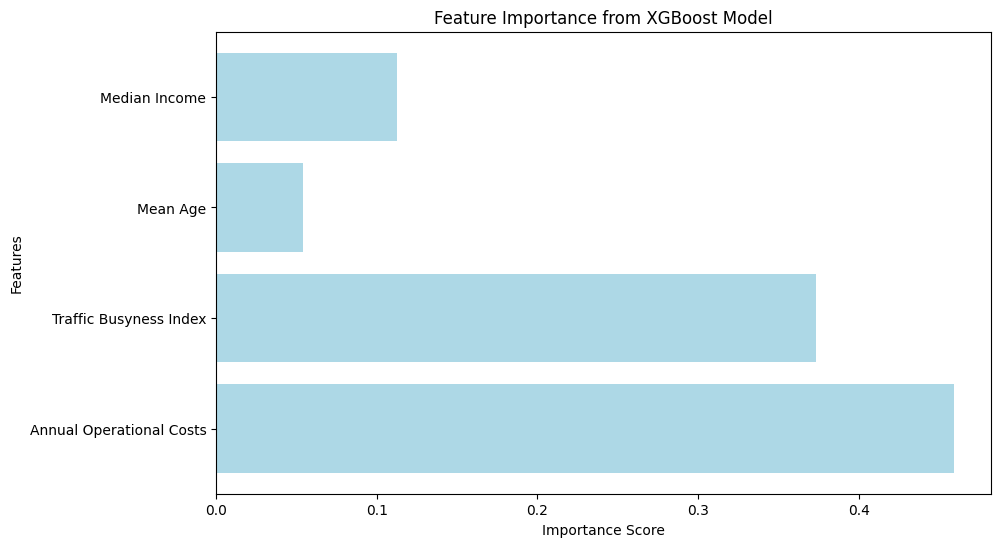

In [57]:
# Feature importance visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming optimized_model and X_test, y_test are already defined

# Features used in the model
features = ['Median Income', 'Mean Age', 'Traffic Busyness Index', 'Annual Operational Costs']
xgb_feature_importance = optimized_model.feature_importances_

# Create the bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(features)), xgb_feature_importance, color='lightblue')
plt.yticks(np.arange(len(features)), features)
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

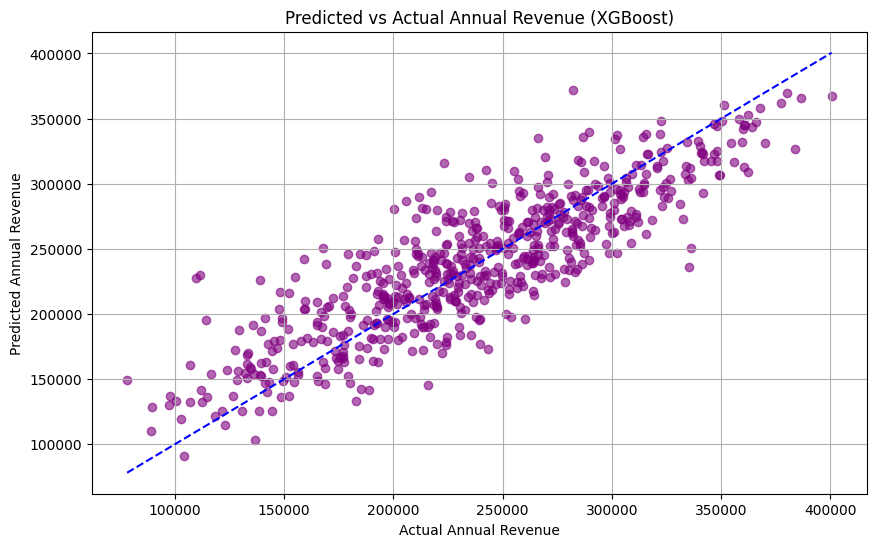

In [58]:
# Scatter plot comparing actual and predicted annual revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')  # Line for perfect prediction
plt.title('Predicted vs Actual Annual Revenue (XGBoost)')
plt.xlabel('Actual Annual Revenue')
plt.ylabel('Predicted Annual Revenue')
plt.grid(True)
plt.show()

Average Profit Margin for Top 10 Locations: $171,101.62
Average Profit Margin for Random 10 Locations: $106,747.61


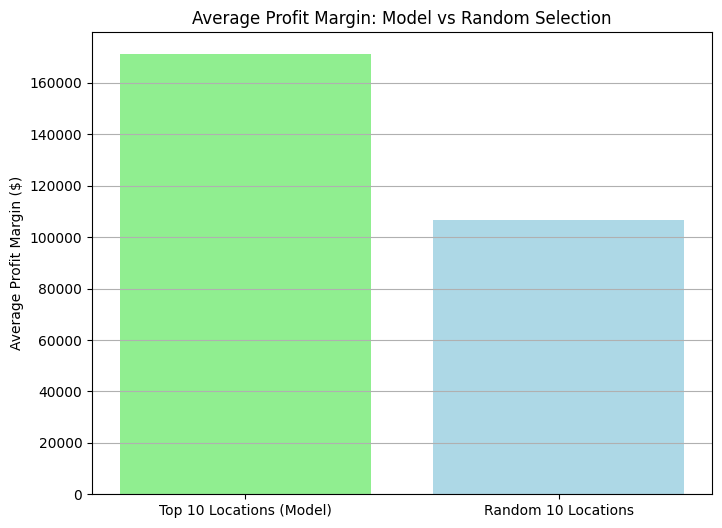

In [80]:
# Calculate the average profit margin for the top 10 locations
avg_profit_margin_top_10 = top_10['Estimated Profit Margin'].mean()
print(f"Average Profit Margin for Top 10 Locations: ${avg_profit_margin_top_10:,.2f}")

import random

# Select 10 random locations from the survey data
random_10 = survey_data.sample(10, random_state=42)

# Calculate the average profit margin for the randomly selected 10 locations
avg_profit_margin_random_10 = random_10['Estimated Profit Margin'].mean()
print(f"Average Profit Margin for Random 10 Locations: ${avg_profit_margin_random_10:,.2f}")

import matplotlib.pyplot as plt

# Prepare data for comparison
comparison = pd.DataFrame({
    'Selection Method': ['Top 10 Locations (Model)', 'Random 10 Locations'],
    'Average Profit Margin': [avg_profit_margin_top_10, avg_profit_margin_random_10]
})

# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(comparison['Selection Method'], comparison['Average Profit Margin'], color=['lightgreen', 'lightblue'])
plt.title('Average Profit Margin: Model vs Random Selection')
plt.ylabel('Average Profit Margin ($)')
plt.grid(True, axis='y')
plt.show()




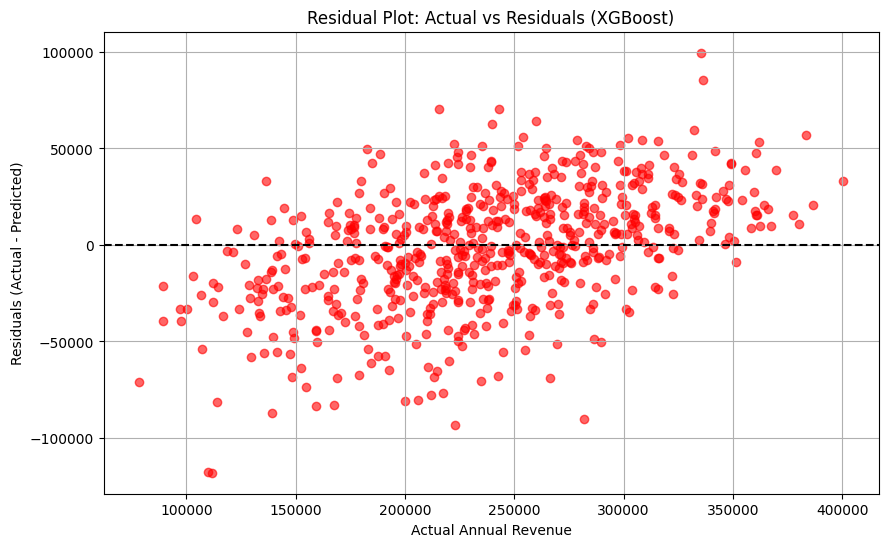

In [78]:
# Residual plot (Actual - Predicted) for optimized XGBoost model
residuals = y_test - y_pred_optimized

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual Plot: Actual vs Residuals (XGBoost)')
plt.xlabel('Actual Annual Revenue')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


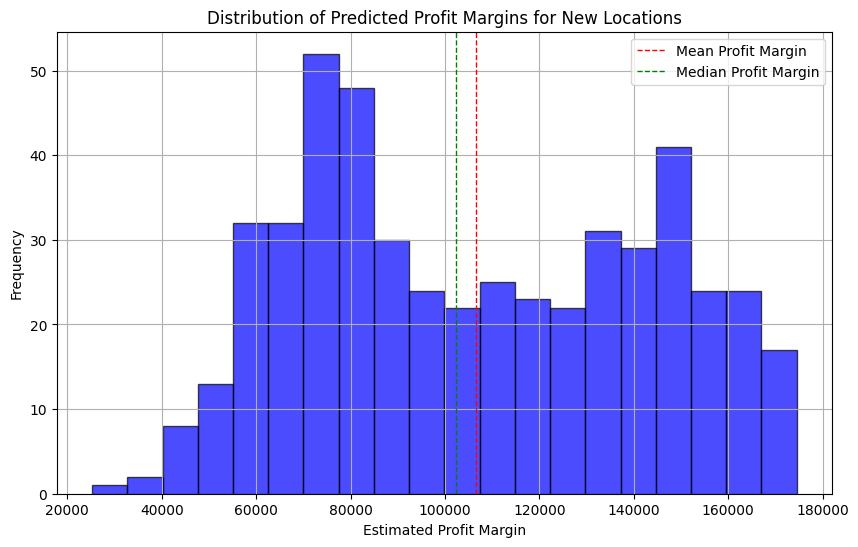

In [61]:
# Histogram for predicted profit margins
plt.figure(figsize=(10, 6))
plt.hist(survey_data['Estimated Profit Margin'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(survey_data['Estimated Profit Margin'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Profit Margin')
plt.axvline(survey_data['Estimated Profit Margin'].median(), color='green', linestyle='dashed', linewidth=1, label='Median Profit Margin')
plt.title('Distribution of Predicted Profit Margins for New Locations')
plt.xlabel('Estimated Profit Margin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()